In [ ]:
# ===============================
# Parameters (to be injected by backend)
# ===============================

try:
    company_name
except NameError:
    company_name = "AMZN"   # default fallback

try:
    start_date
except NameError:
    start_date = "2005-01-01"   # default fallback

try:
    end_date
except NameError:
    end_date = "2025-01-01"     # default fallback

print("📌 Running for:", company_name, start_date, end_date)


In [1]:
# %pip install keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
import time


**WHY USE LSTM? Is it good to predict re-occuring data?I didn't get great results from the 1st notebook and decided to try to predict stock price movements by giving in stock price movements instead of just simple stock prices as input**


**In this notebook I normalized only the closing prices and then broke it into train and test datasets. I just kept a simple lookback window to give all similar data same movement(movement is just giving the data points the same kind of normalization) and put them in price points as input**



In [2]:
# # Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# link = 'https://drive.google.com/file/d/1kF8vlqjNrqoeUavSQr3mkd8KNVkmfigK/view?usp=sharing'

In [4]:
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [ ]:
import pandas as pd
# !pip install gdown -q
# !gdown --id 1ot1gEfwovdcqV7BszQf9gpRkTTjs1fEh
# # downloaded = drive.CreateFile({'id':id})
# # downloaded.GetContentFile('AMZN.csv')
# # Dataset is now stored in a Pandas Dataframe
df3 = pd.read_csv(f'{company_name}_{start_date}_{end_date}.csv')
# Dataset is now stored in a Pandas Dataframe

In [6]:
#VANILLA LSTM NETWORK CREATED:

In [7]:
# %pip install keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
# import time
import time #helper libraries

In [8]:
df3 = df3.dropna(axis = "columns")

In [9]:
df3.head()

,Date,Close,High,Low,Open,Volume
0,2005-01-03,2.2260,2.2720,2.2105,2.2475,208930000
1,2005-01-04,2.1070,2.1630,2.0750,2.1335,388370000
2,2005-01-05,2.0885,2.1380,2.0780,2.0785,167084000
3,2005-01-06,2.0525,2.1125,2.0450,2.0905,174018000
4,2005-01-07,2.1160,2.1345,2.0580,2.0690,196732000


In [10]:
#working with a conventional OHCLV dataset

In [11]:
import numpy as np

In [12]:
#FOCUS ON PREDICTING CLOSING PRICES AS BEFORE

In [13]:
df_close = df3['Close']

In [14]:
df_close.shape

(5033,)

In [15]:
#Reshaping it
# df_close = df_close.values.reshape(2629,1)

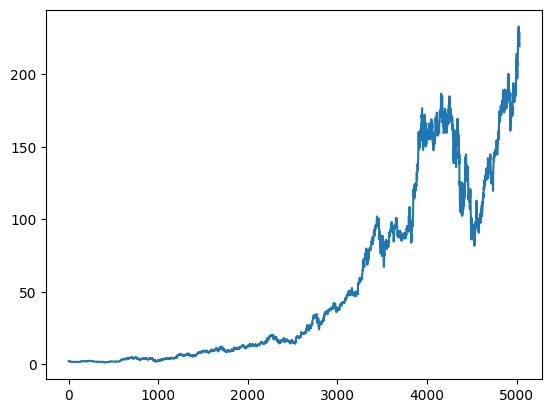

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import joblib

plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close.values.reshape(-1, 1))

joblib.dump(scaler, "scaler.pkl")

In [18]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

4026 1007


**Normalize the values such that prices are reduced to normalized values and I can predict stock movement instead of actual prices**

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

In [22]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    units=50,
    input_shape=(look_back, 1), # Changed input_dim to input_shape
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    units=100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

compilation time :  0.01649165153503418


In [23]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=80, # Changed nb_epoch to epochs
    validation_split=0.05)

Epoch 1/80
30/30 [==============================] - 4s 31ms/step - loss: 0.0166 - mae: 0.0905 - val_loss: 0.2549 - val_mae: 0.4954
Epoch 2/80
30/30 [==============================] - 0s 8ms/step - loss: 0.0144 - mae: 0.0950 - val_loss: 0.2438 - val_mae: 0.4846
Epoch 3/80
30/30 [==============================] - 0s 7ms/step - loss: 0.0135 - mae: 0.0912 - val_loss: 0.2111 - val_mae: 0.4505
Epoch 4/80
30/30 [==============================] - 0s 9ms/step - loss: 0.0120 - mae: 0.0871 - val_loss: 0.1916 - val_mae: 0.4295
Epoch 5/80
30/30 [==============================] - 0s 8ms/step - loss: 0.0101 - mae: 0.0794 - val_loss: 0.1566 - val_mae: 0.3884
Epoch 6/80
30/30 [==============================] - 0s 9ms/step - loss: 0.0077 - mae: 0.0694 - val_loss: 0.1161 - val_mae: 0.3348
Epoch 7/80
30/30 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0544 - val_loss: 0.0608 - val_mae: 0.2418
Epoch 8/80
30/30 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.

**is it overtrained? lets run again with 40 epochs**

In [ ]:
import joblib
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40,
    validation_split=0.05)



joblib.dump(model, "saved_model.pkl")



Epoch 1/40
30/30 [==============================] - 0s 12ms/step - loss: 2.0360e-04 - mae: 0.0095 - val_loss: 3.2407e-04 - val_mae: 0.0146
Epoch 2/40
30/30 [==============================] - 0s 14ms/step - loss: 2.0607e-04 - mae: 0.0096 - val_loss: 2.0648e-04 - val_mae: 0.0107
Epoch 3/40
30/30 [==============================] - 0s 14ms/step - loss: 1.8896e-04 - mae: 0.0092 - val_loss: 2.5319e-04 - val_mae: 0.0124
Epoch 4/40
30/30 [==============================] - 0s 8ms/step - loss: 2.0695e-04 - mae: 0.0095 - val_loss: 4.1784e-04 - val_mae: 0.0169
Epoch 5/40
30/30 [==============================] - 0s 9ms/step - loss: 1.9413e-04 - mae: 0.0093 - val_loss: 3.1094e-04 - val_mae: 0.0142
Epoch 6/40
30/30 [==============================] - 0s 8ms/step - loss: 1.9520e-04 - mae: 0.0093 - val_loss: 2.0793e-04 - val_mae: 0.0108
Epoch 7/40
30/30 [==============================] - 0s 9ms/step - loss: 1.9779e-04 - mae: 0.0093 - val_loss: 2.2162e-04 - val_mae: 0.0113
Epoch 8/40
30/30 [=============

**Final Predictions**

32/32 [==============================] - 1s 3ms/step


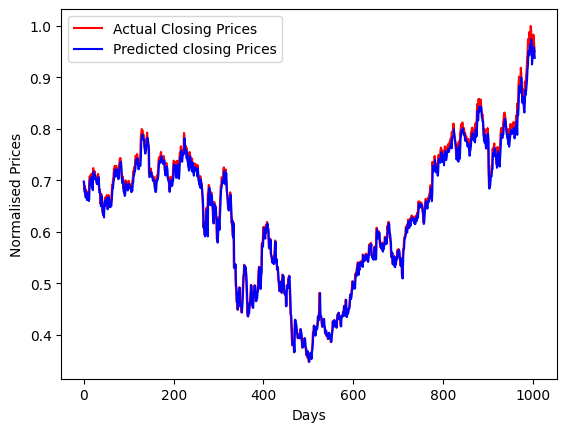

In [25]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

**So LSTM  works great to predict Closing Prices when we normalize the prices and predict the stock Price movement.**

In [26]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

32/32 [==============================] - 0s 3ms/step - loss: 2.0172e-05 - mae: 0.0021
